## Sales Forecasting Using Prophet

#### Objective:

To build an accurate time series model using Facebook Prophet to forecast daily sales for Rossmann stores. This forecast will help the company optimize inventory, staffing, and marketing strategies.

#### Dataset: https://www.kaggle.com/c/rossmann-store-sales/data


###### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

##### 2. Import Sales Data

In [2]:
sales_df = pd.read_csv(r'C:\Users\dimas\Downloads/train.csv')

In [3]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


##### 2.1  Understanding Data

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


##### 3. Import Store Information Data

In [6]:
store_df = pd.read_csv(r'C:\Users\dimas\Downloads/store.csv')

In [7]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


##### 3.1 Understanding Data

In [8]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### 4. Explore Dataset

##### 4.1 Explore Sales Data

###### 4.1.1 Check Missing Values

<Axes: >

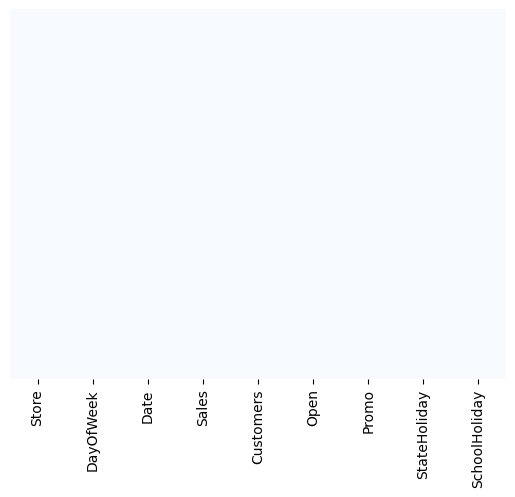

In [10]:
sns.heatmap(sales_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

###### 4.1.2 Check Distribution of data

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

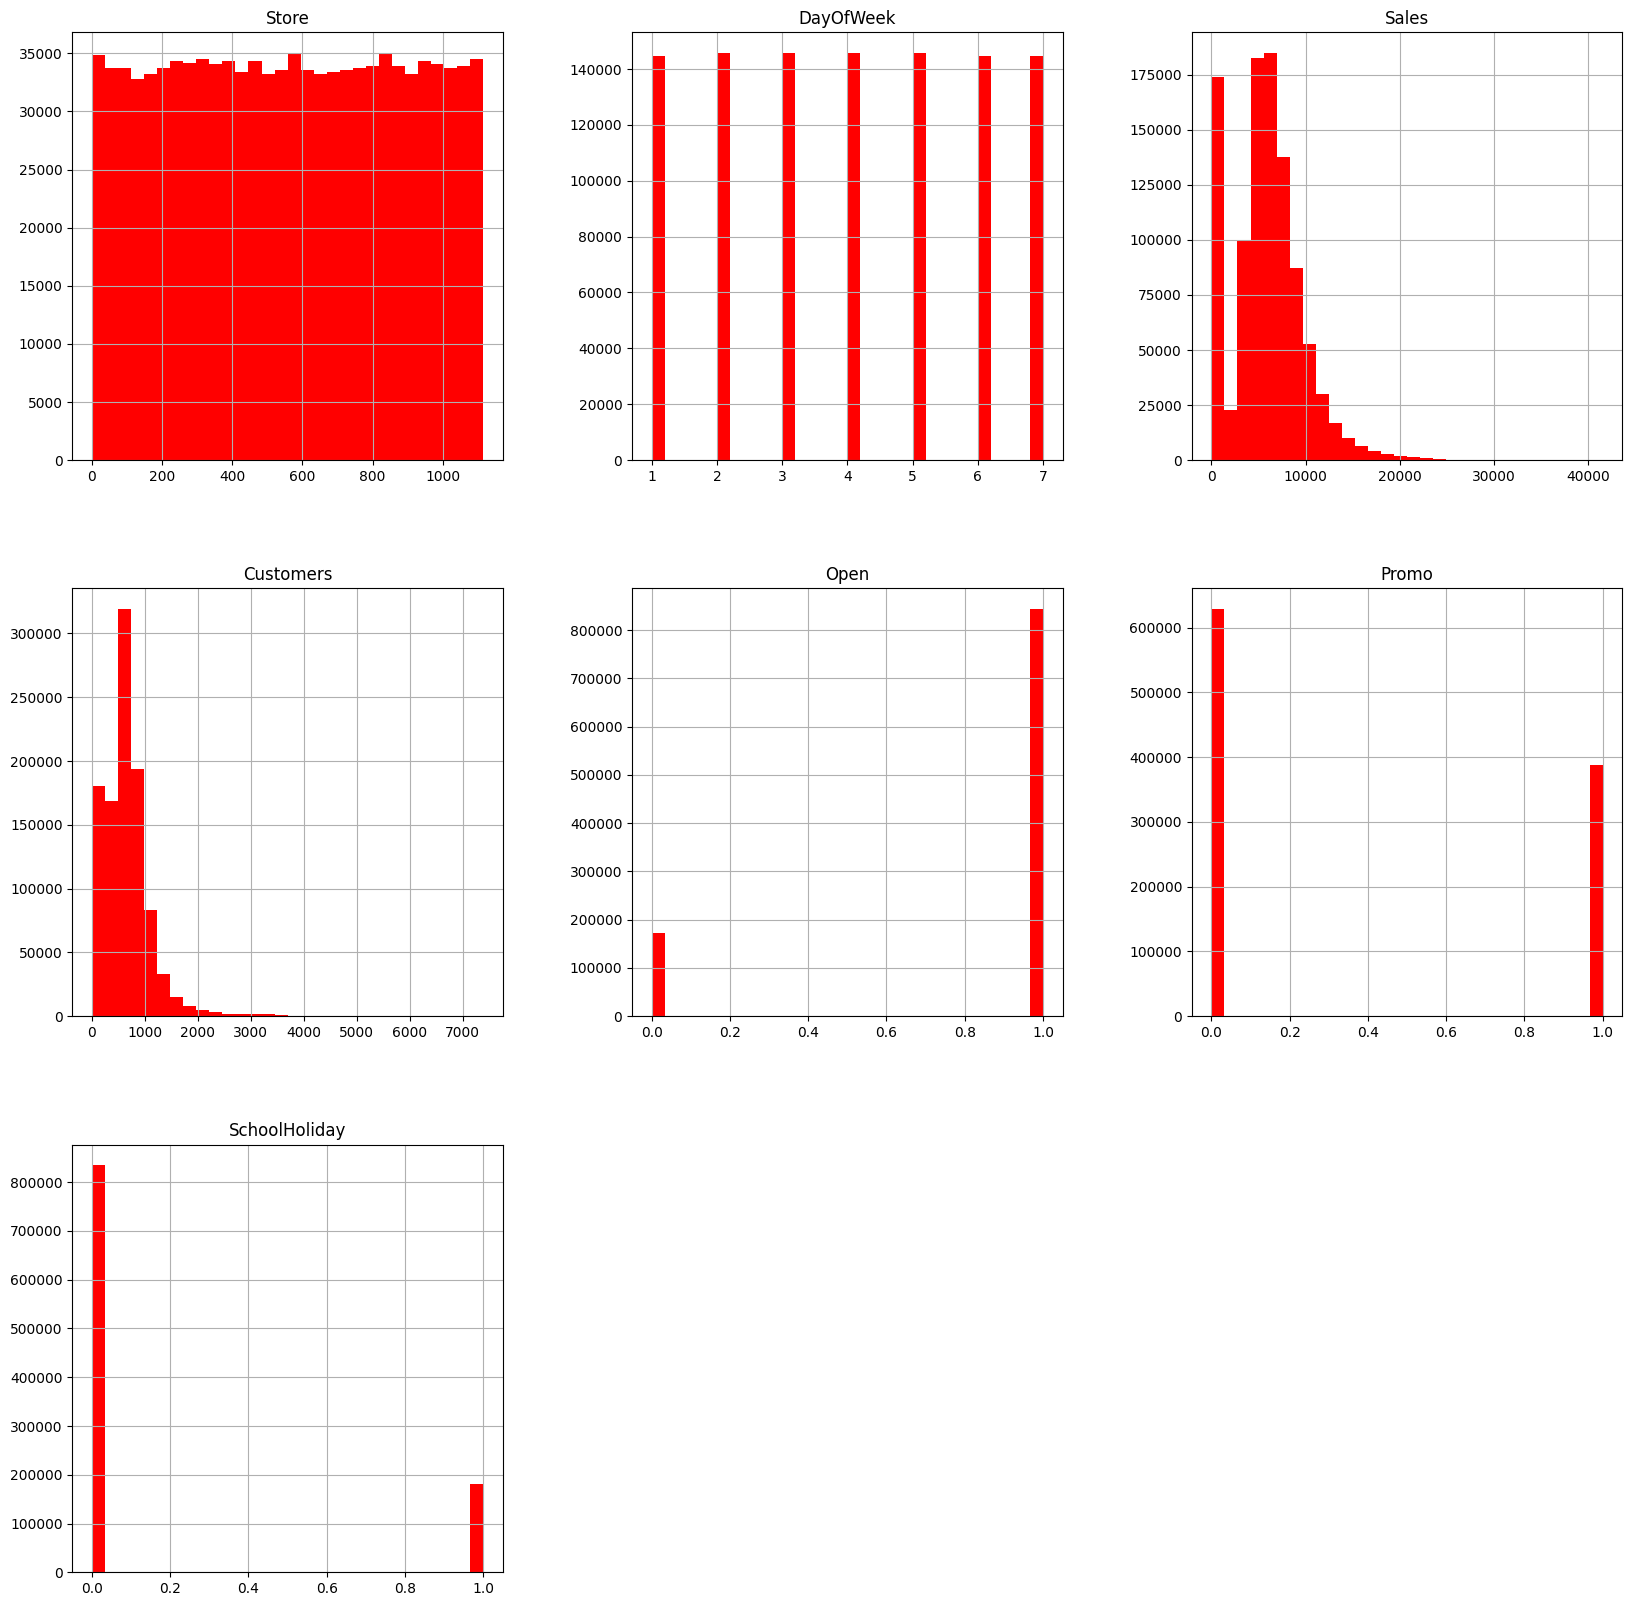

In [11]:
sales_df.hist(bins = 30, figsize = (20,20), color = 'r')

#### Insight

* Data is equally distributed among all stores (no bias)
* Data is equally distibuted across various Days of the week 
* Average sales around 5000-6000 Euros
* Average 600 customers per day
* Stores are open ~80% of the time
* Promo #1 was running ~40% of the time 
* School holidays are around ~18% of the time

###### 4.1.3 how many stores are open and closed! 

In [12]:
closed_sales_df        = sales_df[sales_df['Open'] == 0]
open_sales_df          = sales_df[sales_df['Open'] == 1]

In [13]:
print("Total =", len(sales_df))
print("Number of closed stores =", len(closed_sales_df))
print("Number of open stores =", len(open_sales_df))

Total = 1017209
Number of closed stores = 172817
Number of open stores = 844392


###### 4.1.4 Remove closed stores because (all customers are set to zero) and drop open column

In [14]:
sales_df = sales_df[sales_df['Open'] == 1]

In [15]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [16]:
sales_df.drop(['Open'], axis=1, inplace=True)

In [17]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [18]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


####### Average sales = 6955 Euros,	average number of customers = 762	(went up)

##### 4.2 Explore Store Data

###### 4.1.1 Check Missing Values

<Axes: >

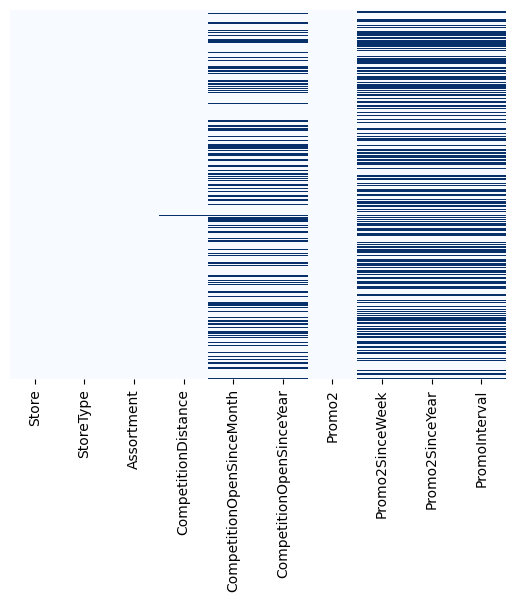

In [19]:
sns.heatmap(store_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

###### Let's take a look at the missing values in the 'CompetitionDistance'


In [20]:
 store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


###### Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'


In [21]:
 store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


###### When Promo2 Column = 0 the Promo2SinceYear and PromoInterval are NULL. Let's Check

In [22]:
 store_df[store_df['Promo2']==0].isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            2
CompetitionOpenSinceMonth    148
CompetitionOpenSinceYear     148
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
store_df['Promo2'].unique()

array([0, 1])

###### Insight:

* CompetitionDistance has 3 missing values
* CompetitionOpenSinceMonth has 354 missing values
* Promo2SinceWeek, Promo2SinceYear, PromoInterval are have 544 missing values                                           

###### Let's Set these values to zero

In [24]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

In [25]:
for str in str_cols:
    store_df [str].fillna(0, inplace = True)

###### Note: Why Promo & Competition Values Are Filled with 0

###### Promo2
- If `Promo2 = 0`, it means the store is **not participating in the Promo2 program**.
- Columns like `Promo2SinceWeek`, `Promo2SinceYear`, and `PromoInterval` become **irrelevant**.
- These are filled with `0` to indicate **no promotion**, and to keep the data numeric.

###### Competition
- If `CompetitionOpenSinceYear` or `CompetitionOpenSinceMonth` is missing, it means **no competitor is recorded**.
- Filled with `0` as an indicator that **no competitor exists yet**, rather than a valid year/month.
- Purpose: to avoid `NaN`, maintain data types, and ensure the model can train without errors.


<Axes: >

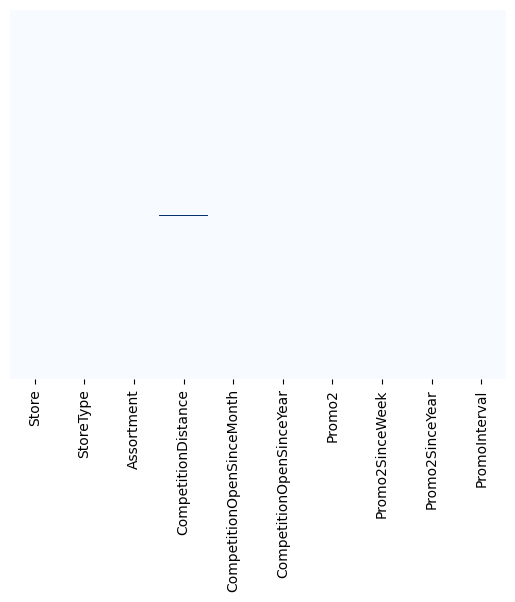

In [26]:
sns.heatmap(store_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

###### There are 2 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column


In [27]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

###### Check

<Axes: >

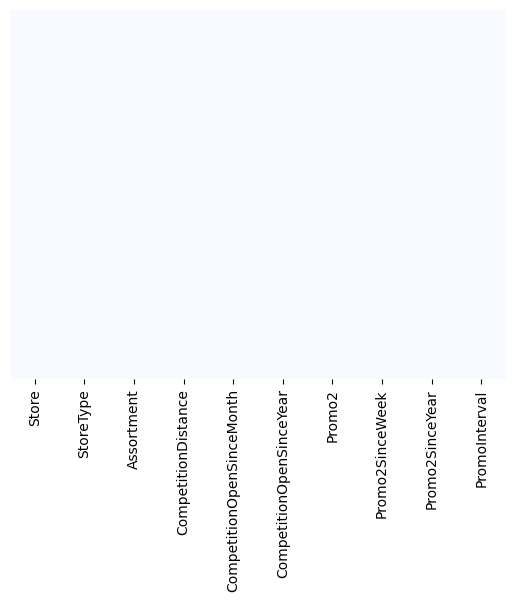

In [28]:
 sns.heatmap(store_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

###### Let's Check the Distribution again after cleaning

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

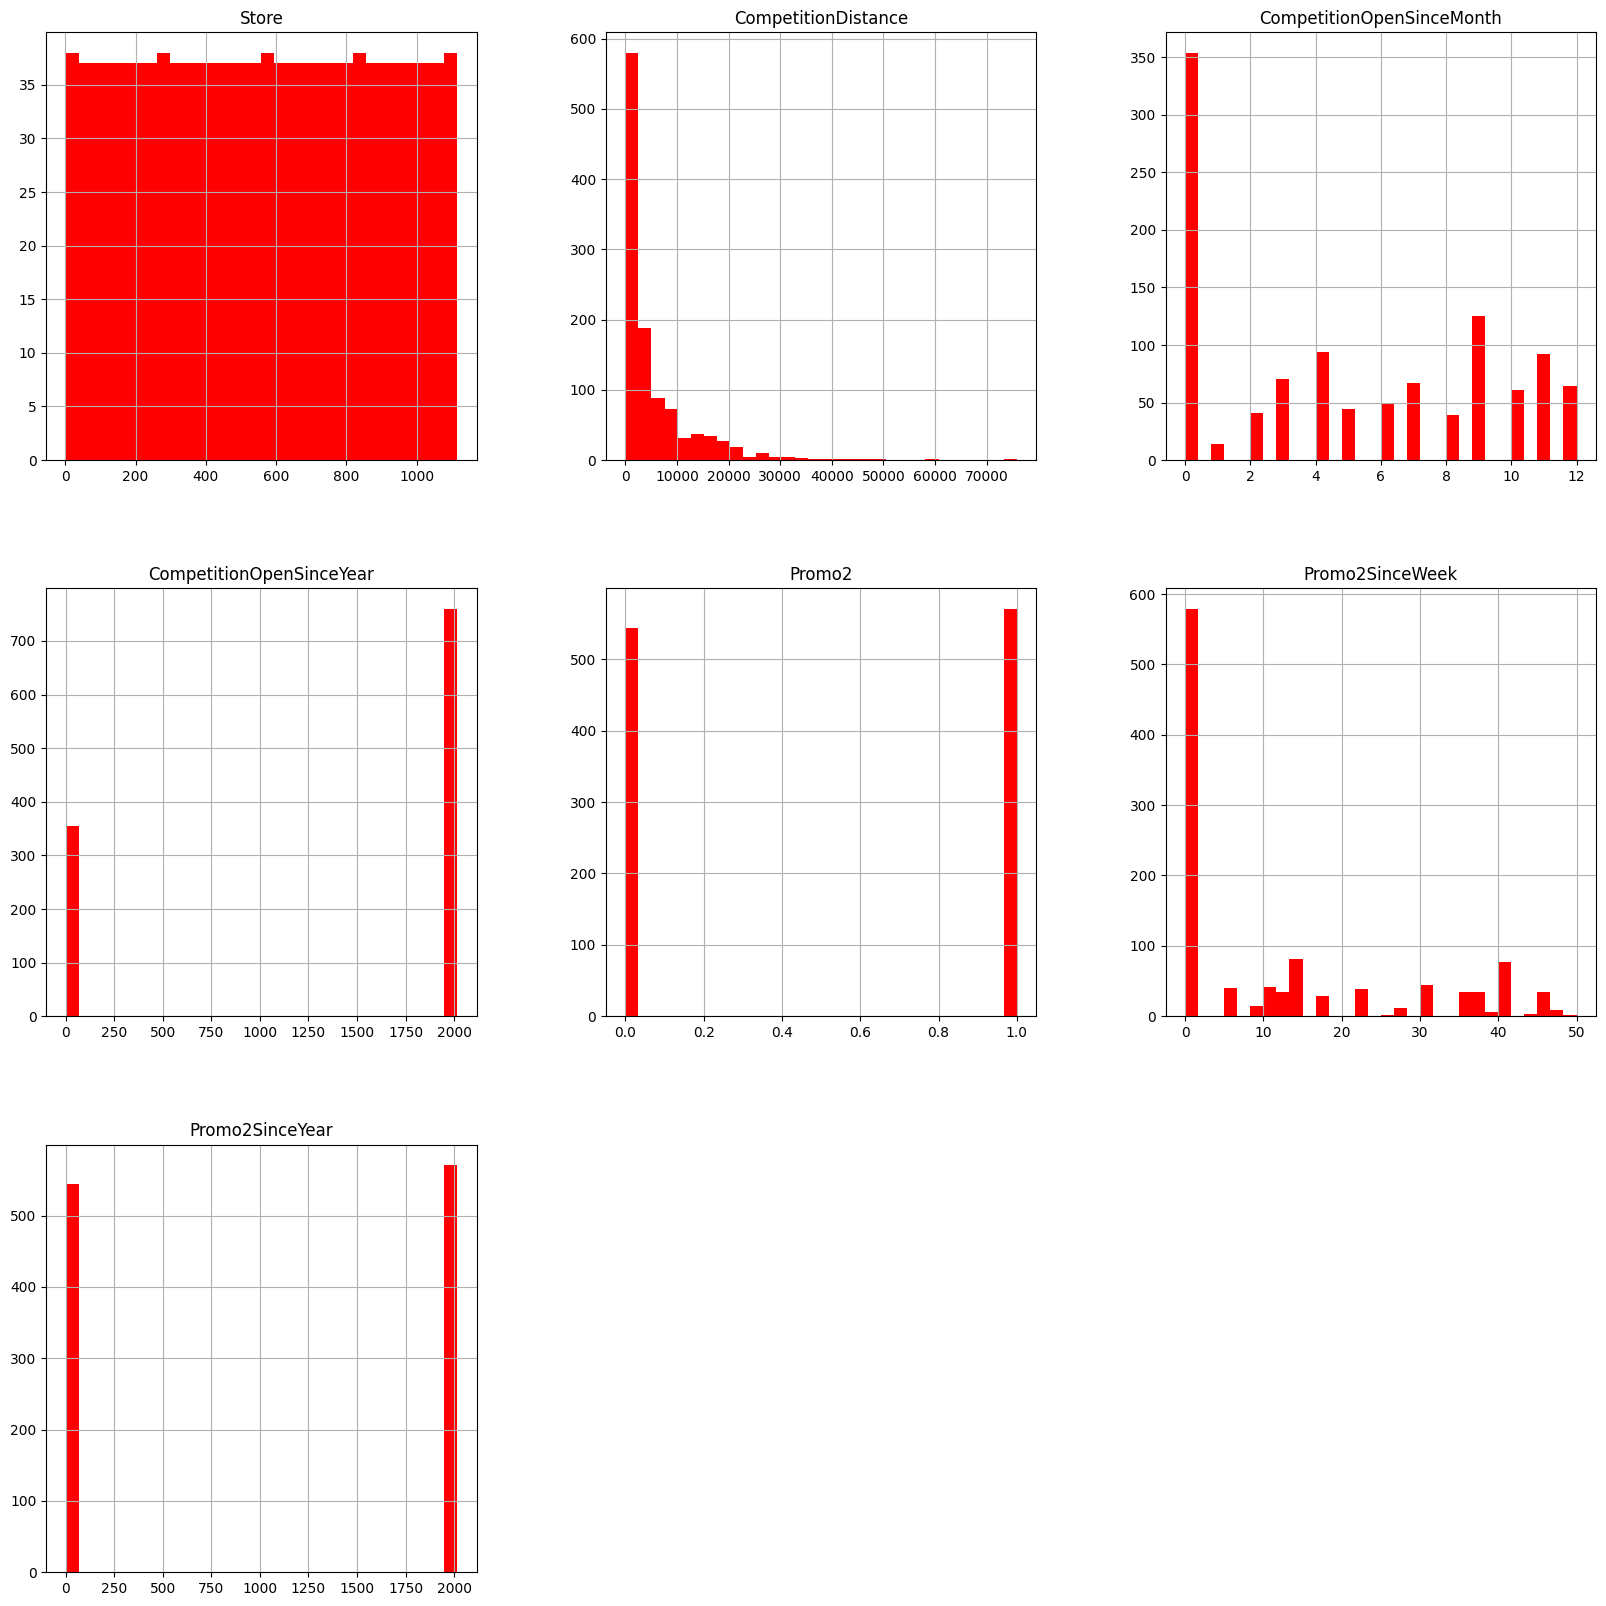

In [29]:
store_df.hist(bins = 30, figsize = (20,20), color = 'r')

###### Insight: 

* half of stores are involved in promo 2
* half of the stores have their competition at a distance of 0-3000m


### 4.3 Explore Merge Dataset

#### 4.3.1 Merge both data (sales and store)

* Sales_df contain Million Rows
* Store_df Contan 1000 Rows

* Each data have unique ID Columns (Store)

In [30]:
all_df = pd.merge(sales_df, store_df, how='inner', on='Store')

In [31]:
all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


##### 4.3.2 See the correlation with target (Sales) 


In [32]:
correlations = all_df.select_dtypes(include=['number']).corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

###### Insight:

* customers and promo are positively correlated with the sales 
* Promo2 does not seem to be effective at all 

##### 4.3.3 See correlations between all features

<Axes: >

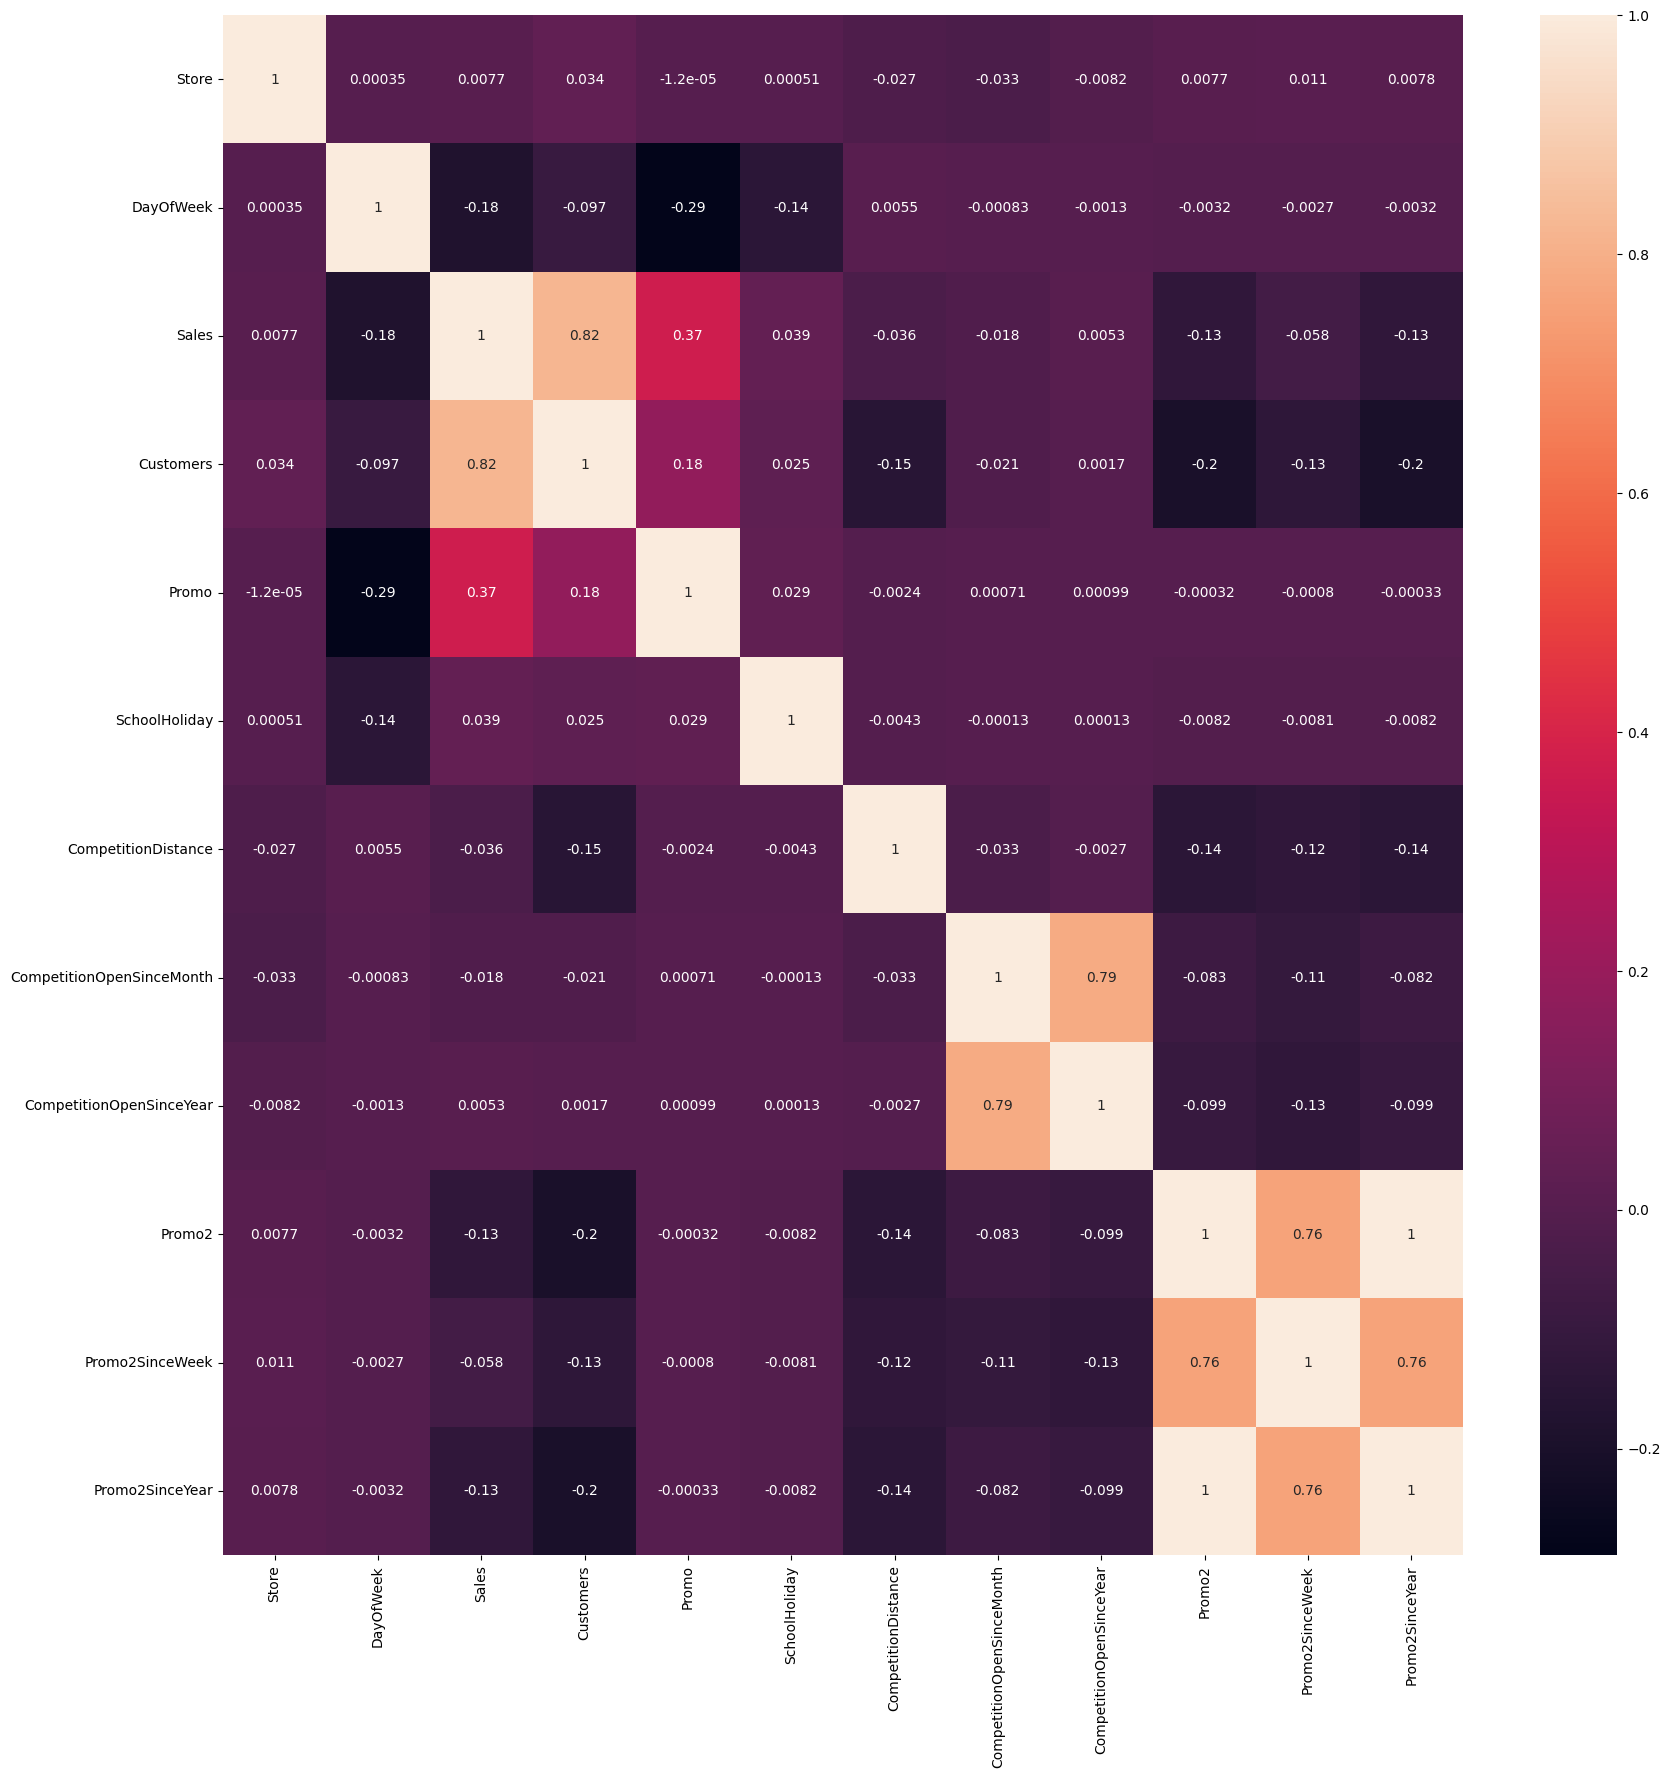

In [33]:
correlations = all_df.select_dtypes(include=['number']).corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

###### Insight:

* Customers/Prmo2 and sales are strongly correlated 

##### 4.3.4 Separate Year and put it into a separate columns

In [34]:
all_df['Year'] = pd.DatetimeIndex(all_df['Date']).year

In [35]:
all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013


##### 4.3.5 Do the same (Separate Month and day and put it into a separate columns)

In [36]:
all_df['Month'] = pd.DatetimeIndex(all_df['Date']).month

all_df['Day'] = pd.DatetimeIndex(all_df['Date']).day

In [37]:
all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


##### Let's take a look at the average sales and number of customers per month 


Text(0.5, 1.0, 'Average Customers Per Month')

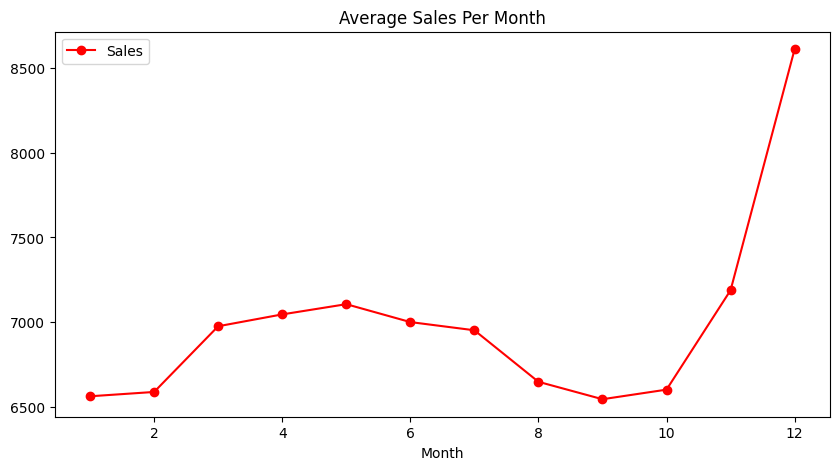

<Figure size 640x480 with 0 Axes>

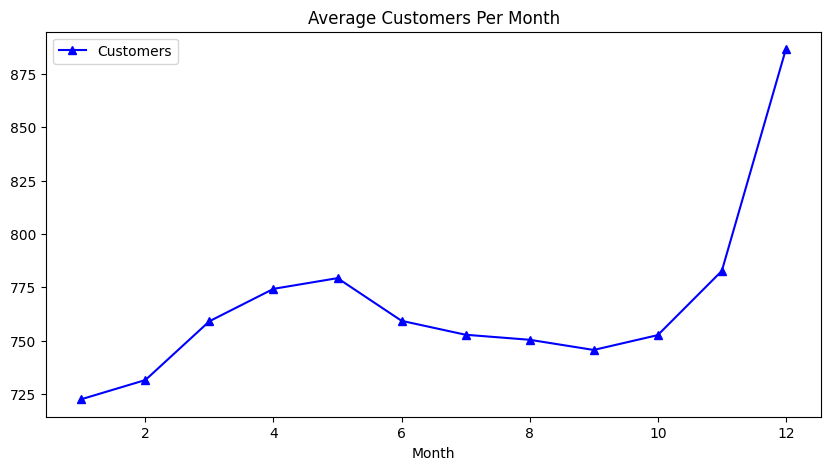

In [38]:
axis = all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()
axis = all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Month')

###### Insight:

* It looks like sales and number of customers peak around christmas timeframe

##### Let's take a look at the average sales and number of customers per day of the month 


Text(0.5, 1.0, 'Average Sales Per Day')

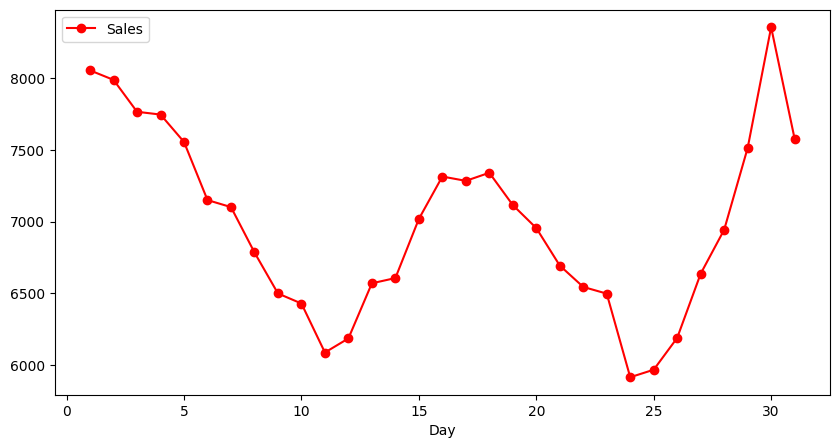

<Figure size 640x480 with 0 Axes>

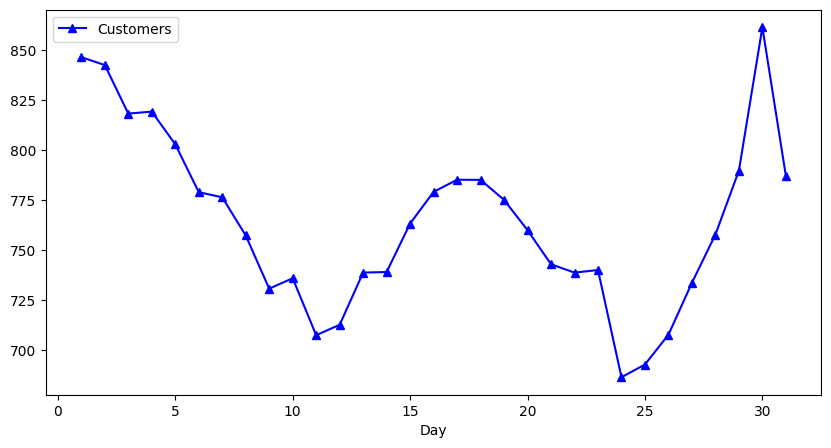

In [39]:
ax = all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()
ax = all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Sales Per Day')

###### Insight:

* Minimum number of customers are generally around the 24th of the month 
* Most customers and sales are around 30th and 1st of the month

##### Let's take a look at the average sales and number of customers for per day of the week (NOTE: 7 = Sunday)


Text(0.5, 1.0, 'Average Customers Per Day of the Week')

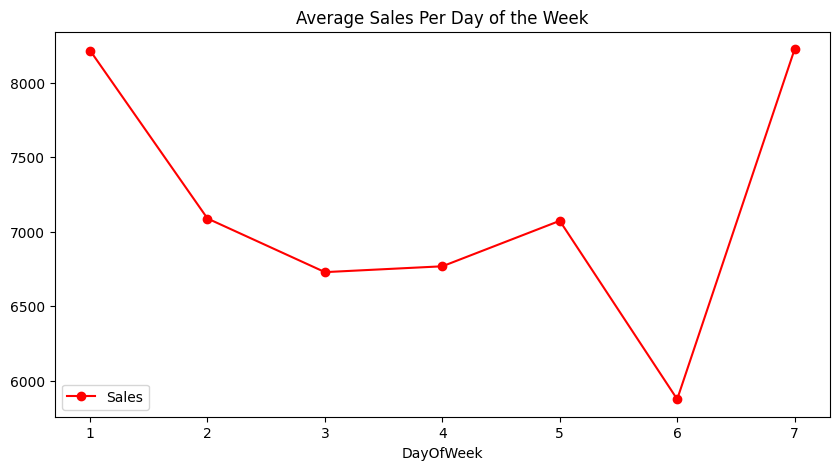

<Figure size 640x480 with 0 Axes>

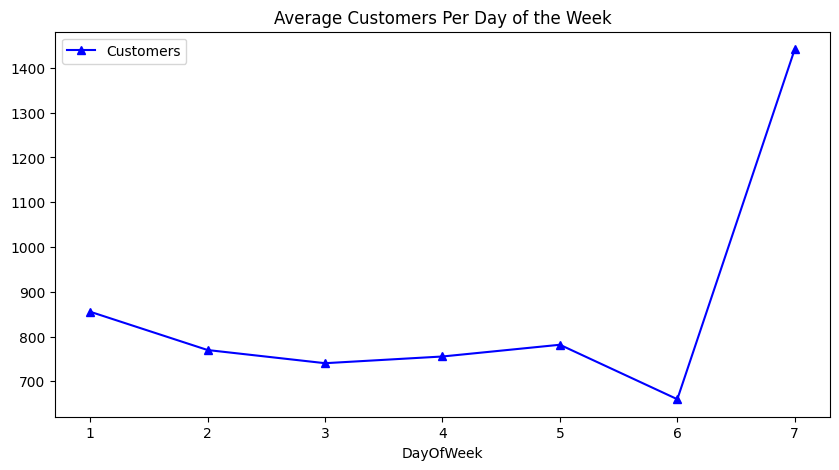

In [40]:
axis = all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()
axis = all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')

###### Insight:

* Most sales and customers is on sunday 

##### Let's see relationship between promo with sales and promo with customers


<Axes: xlabel='Promo', ylabel='Customers'>

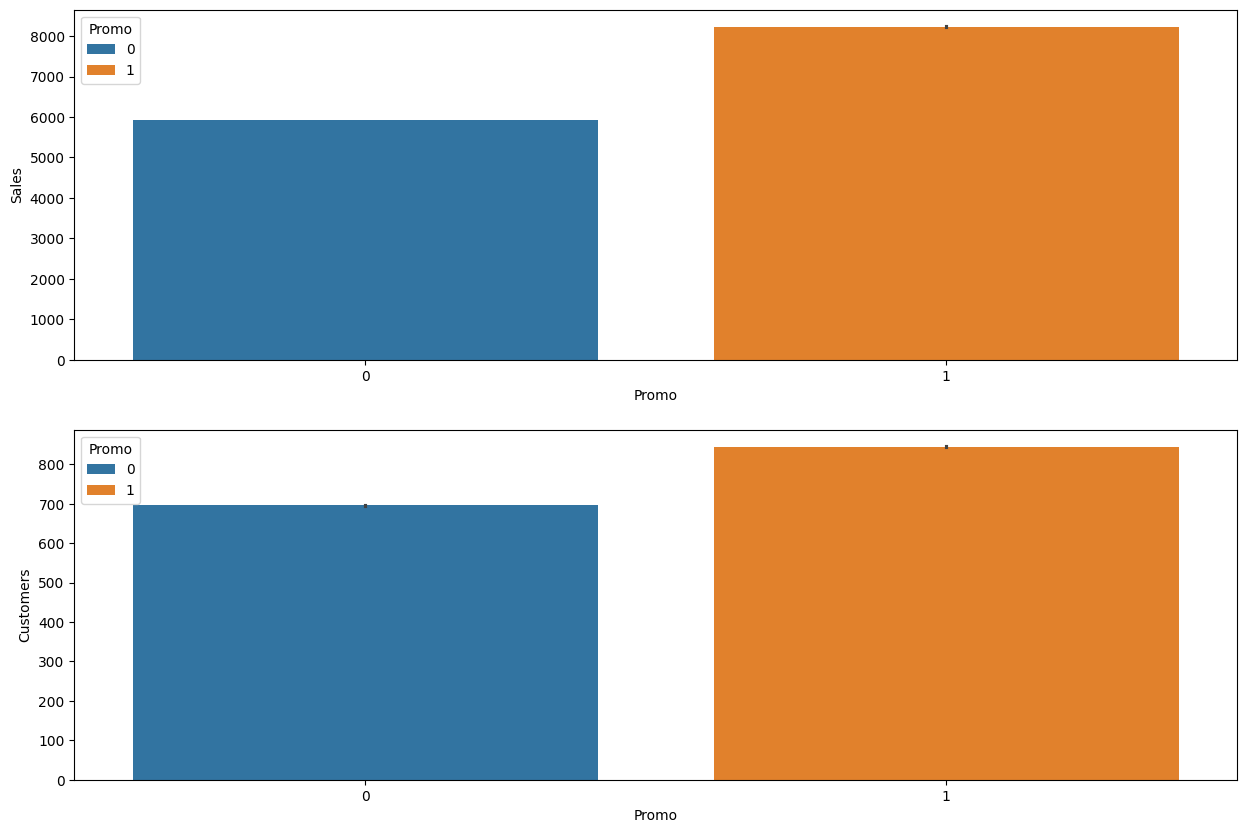

In [41]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = all_df,hue='Promo')

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = all_df,hue='Promo')

###### Insight:

* By applying promo1, the sales and customres go up

### 5. Sales Forecasting Using Prophet

In [42]:
from prophet import Prophet

##### 5.1  Sales Prediction by Store ID

In [43]:
def sales_prediction(Store_ID, all_df, periods):
    # 1. Filter dan cek data
    df = all_df[all_df['Store'] == Store_ID].copy()
    if df.empty:
        print(f"Tidak ada data untuk Store_ID={Store_ID}")
        return None

    # 2. Format kolom untuk Prophet
    df['ds'] = pd.to_datetime(df['Date'])
    df = df[['ds','Sales']].rename(columns={'Sales':'y'}).sort_values('ds')

    # 3. Latih model
    model = Prophet()
    model.fit(df)

    # 4. Prediksi
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    # 5. Plot hasil
    fig1 = model.plot(forecast, xlabel='Date', ylabel='Sales')
    plt.show()
    fig2 = model.plot_components(forecast)
    plt.show()

    # 6. Kembalikan DataFrame prediksi
    return forecast


14:54:54 - cmdstanpy - INFO - Chain [1] start processing
14:54:56 - cmdstanpy - INFO - Chain [1] done processing


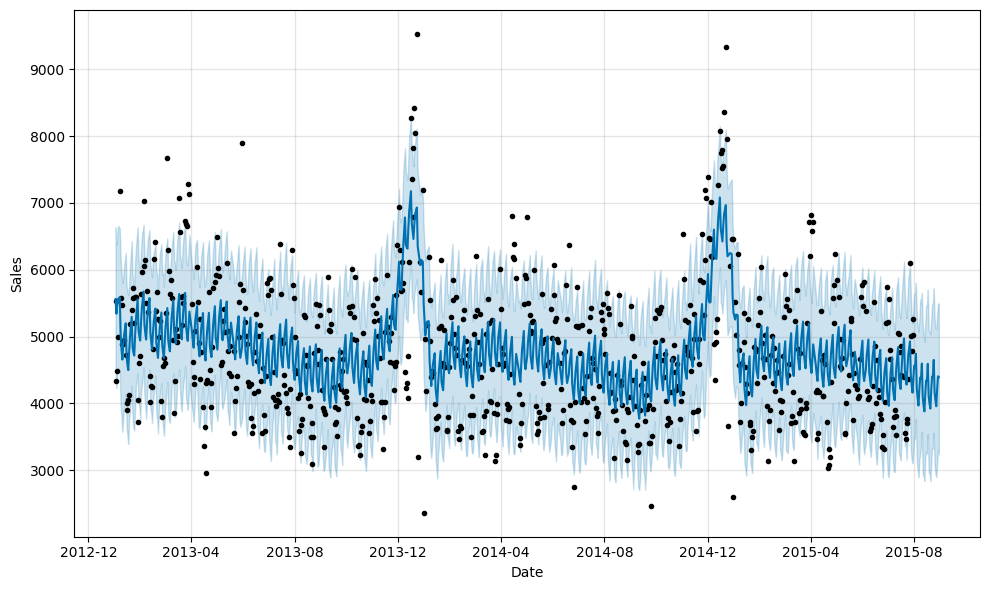

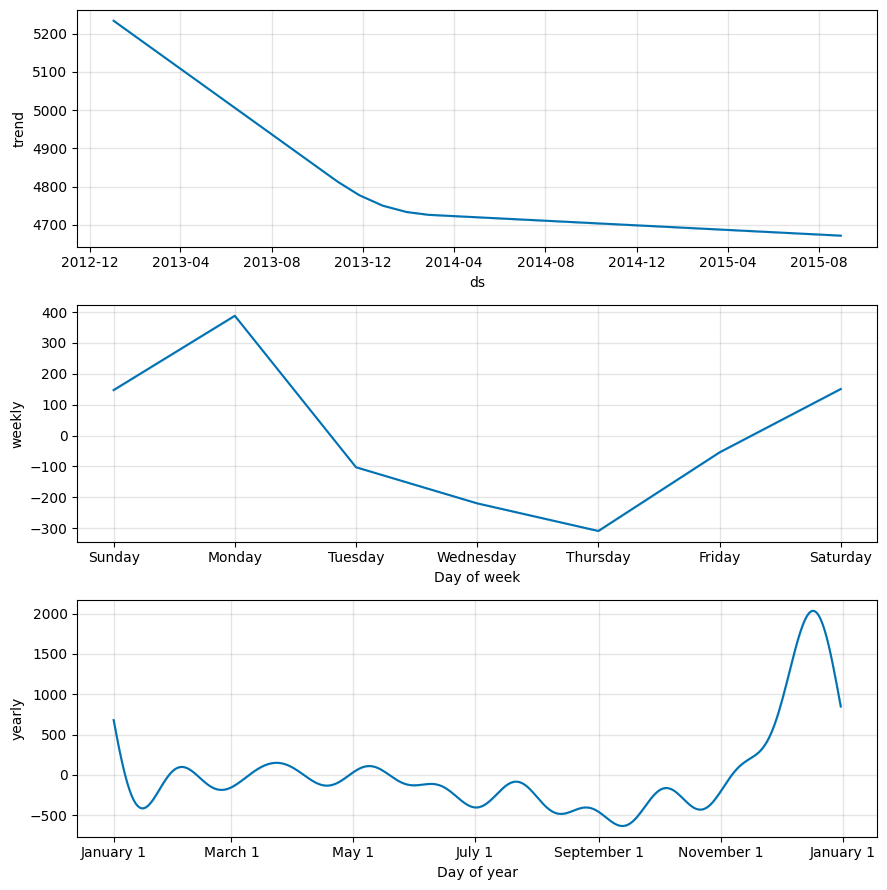

In [44]:
forecast = sales_prediction(Store_ID=1, all_df=all_df, periods=30)

## Interpretation Based on Prophet Plot

- **Main Visual**
  - Black dots = actual daily sales data.
  - Blue line = model prediction following historical patterns.
  - Light blue shaded area = uncertainty interval.

- **Overall Trend**
  - The blue line shows a downward trend at the beginning of the historical period, but a sharp increase toward the end of the year.
  - This likely indicates an annual seasonal pattern (e.g., Christmas or year-end holidays) that significantly affects sales.
  - The spike is consistent every year and is likely to happen again in the following years.

- **Weekly Seasonality**
  - The weekly plot shows peaks at the beginning of the week (e.g., Monday), dips mid-week (Wednesday–Thursday), and a slight rise again at the end of the week.
  - Insight: early weekdays are busier, midweek tends to be slow, weekends are moderate.
  - Simple recommendation: stock up and schedule more staff on busy days; consider light promotions on slow days.

- **Yearly Seasonality**
  - A clear spike near the end of the year and a drop at the beginning of the year are observed. This pattern repeats every year.
  - Insight: prepare inventory and promotions for the year-end peak season, and plan engagement initiatives for the early-year low season.

- **Outliers / Anomalies**
  - Black dots that fall far outside the light blue band (especially at seasonal peaks) indicate days with unusually high or low sales, likely due to special events or external factors.
  - Insight: log the cause of those events; if they recur, add them as special events in the model for more accurate forecasting.

- **Uncertainty**
  - The light blue shaded area widens into the future, indicating increasing uncertainty.
  - Insight: prepare inventory buffers or contingency plans based on the forecast range.


---

##  Key Insights

- Sales and number of customers **peak around Christmas**, suggesting strong year-end seasonality.
- Weekly seasonality shows **higher sales early in the week** (e.g., Monday), a dip mid-week, and a moderate recovery by the weekend.
- **24th of each month** typically sees the **lowest customer traffic**, while the **30th and 1st** see the **highest**.
- Sales patterns are consistent year over year, with **predictable holiday-driven spikes**.
- Outliers in the forecast (black dots far from prediction band) may indicate **special events or external factors** not captured in the base model.
- Forecast uncertainty increases over time, as shown by the widening light-blue band.

---

##  Recommendations

- **Stock and staff planning** should prioritize early-week and year-end peaks.
- Consider **promotions or engagement campaigns mid-week and during early-year dips** to balance traffic.
- **Log special events** (e.g., national holidays, store-specific promos) to include as regressors in future models.
- Use **rolling forecasts** with regular model updates to reduce long-term uncertainty.
- Prepare **inventory buffers** during high-uncertainty periods to handle variability in demand.

---

##  Conclusion

Prophet effectively captures both **weekly and yearly seasonality** in Rossmann sales data. These patterns support **data-driven planning** for operations and promotions. By aligning resources with high-demand periods and mitigating low-demand risks, stores can improve performance and customer satisfaction.
